In [8]:
import mne
mne.set_log_level('error')
import numpy as np
import matplotlib.pyplot as plt

from mne import Epochs, pick_types
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.io import concatenate_raws, read_raw_edf

# Charging the data

Each subjects perform 14 experimental runs:

1. Baseline, eyes open
2. Baseline, eyes closed
3. Task 1 (open and close left or right fist)
4. Task 2 (imagine opening and closing left or right fist)
5. Task 3 (open and close both fists or both feet)
6. Task 4 (imagine opening and closing both fists or both feet)
7. Task 1
8. Task 2
9. Task 3
10. Task 4
11. Task 1
12. Task 2
13. Task 3
14. Task 4


In [12]:
# Create a list with each tipe of experimental run
runs_openeye = [1]
runs_clodeseye = [2]
runs_fists = [3, 7, 11]
runs_imagine_fists = [4, 8, 12]
runs_fistsfeet = [5, 9, 13]
runs_imagine_fistsfeet = [6, 10, 14]


In [9]:
# List with the ID of each participant
participants = [_ for _ in range(1,110)]

# List with the 14 experimet runs each participant did
run = [_ for _ in range(1,15)]  

# Creating a dictonary containing the raw data of a specific participant
participant = participants[16]
dic_runs = {}
for _ in run:
    file_path = f'files/S{participant:03}/S{participant:03}R{_:02}.edf'
    dic_runs[f'raw{_}'] = mne.io.read_raw_edf(file_path)

# Setting the montage

In [10]:
eegbci.standardize(dic_runs['raw3'])
montage = mne.channels.make_standard_montage("standard_1005")
dic_runs['raw3'].set_montage(montage)

<RawEDF | S017R03.edf, 64 x 19680 (123.0 s), ~76 kB, data not loaded>

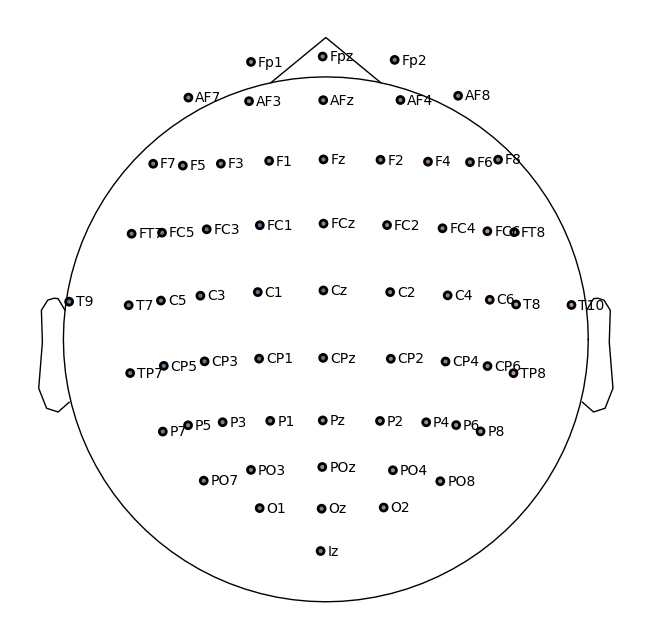

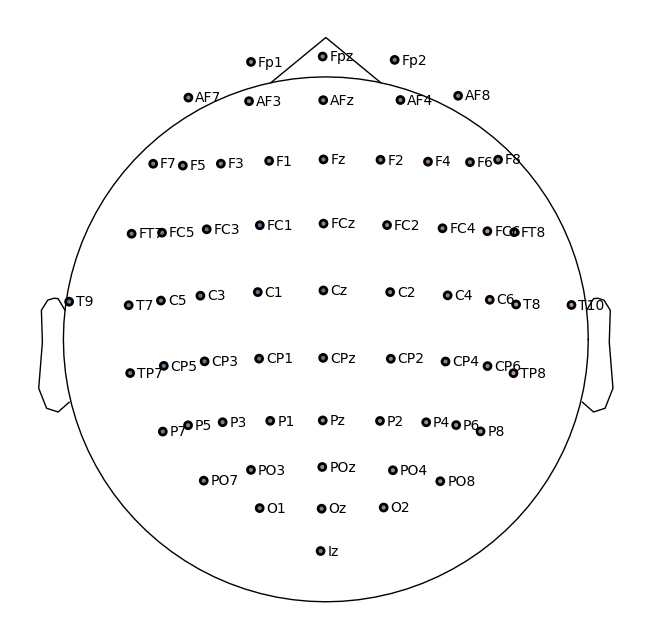

In [11]:
dic_runs['raw3'].info.plot_sensors(ch_type = 'eeg', show_names=True, ch_groups='position')


In [ ]:
# Dictionary with the structure old_name : correct_cases_name. To respect the upper and lower cases of the standard notation for the electrde's position.
replacement = {
    'Fc': 'FC',
    'Cp': 'CP',
    'Af': 'AF',
    'Ft': 'FT',
    'Tp': 'TP',
    'Po': 'PO'   
}

# new_name is the dictionary to use to cange the name of the electrode's positions to respect the usual sandard notataions.
# First get rid of the excessive "." 
new_names = {
    name : name.replace(".", "") for name in dic_runs['raw1'].info['ch_names']
}

# Change the lower and upper case of the electrode's names
for key in new_names.keys():
    for old_string, new_string in replacement.items():
        new_names[key] = new_names[key].replace(old_string, new_string)

# Choose the montage and set it for the uploaded data
montage = 'standard_1020'
for _ in run:
        dic_runs[f'raw{_}'].rename_channels(new_names)
        dic_runs[f'raw{_}'].set_montage(montage)